# Visualizing Caliper Events:<br />An Example Using Python With `pandas` and `numpy`
> 💡This notebook requires a few Python modules in addition to the common ones.  See the ["Prerequisites" section](#Prerequisites) at the end of this notebook for more information, especially if you see error messages or the notebook doesn't run correctly.

## Introduction

This notebook reads Caliper events that were generated by an application.  For each course, it graphs the number of events that were found for each hour of the day, day of the week, and day of the year.

It was written to work with Caliper v1.0 events generated by the Problem Roulette (v1.0) application.  However, it may work with other event data JSON that contains "`.eventTime`" and "`.group.name`" attributes.

## Configuration

The values of the variables in the cell below may be changed to specify the locations of the input data and output visualizations and other options.

In [1]:
# Path to input data file.  Files that have been compressed with gzip are supported.
path = './pr.jsonl.gz'

# Is the input JSONL (JSON Lines)? (If False, input will be treated as plain JSON)
# The JSONL format (AKA NDJSON, newline-delimited JSON) contains complete JSON objects
# separated only by line breaks (newline or carriage return)
jsonlInput = True

# Output to PDF?  (If False, display output inline with Jupyter Notebook)
pdfOutput = False

# Name of PDF output file.  (Ignored if pdfOutput == False)
pdfFilename = 'events.pdf'

## Initialization
Load the various Python modules needed.

In [2]:
from eventsTools import *

## Load the JSON Data Input File

In [3]:
all_recs = loadEventJson(path, jsonlInput)

print('Loaded {} records.'.format(len(all_recs)))

Loaded 18419 records.


## Extract Data From Caliper Events

In [4]:
# Extract some fields for each event; agg is a map from course names
# to event time stamps, the event times are split into columns
# according to the time.struct_time fields:
# https://docs.python.org/3/library/time.html#time.struct_time
agg = []
tfields = ['tm_hour', 'tm_mday', 'tm_min', 'tm_mon', 'tm_wday', 'tm_yday', 'tm_year']

for js in all_recs:
    user = extractEventActorUserId(js)
    if (user is False) or (len(user) < 3):
        continue

    course = extractEventCourseName(js)
    if course is False:
        continue
    
    etime = extractEventTime(js, tfields)

    eventData = etime    
    eventData.append(course)
    agg.append(eventData)

agg = pd.DataFrame(agg)
agg.columns = tfields + ['course']

## Produce Visualizations

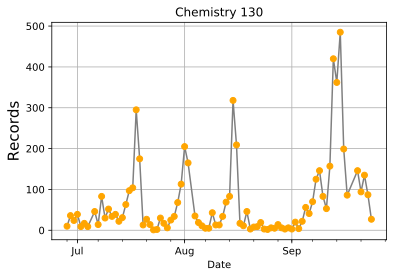

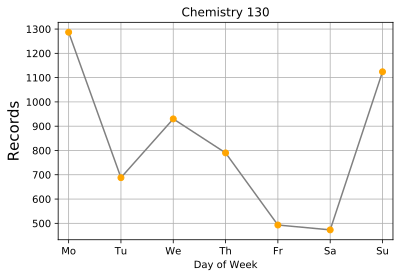

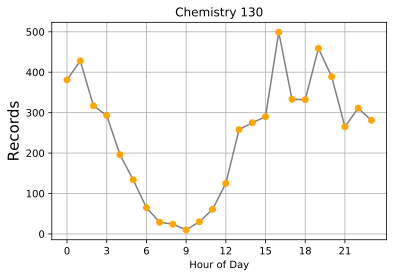

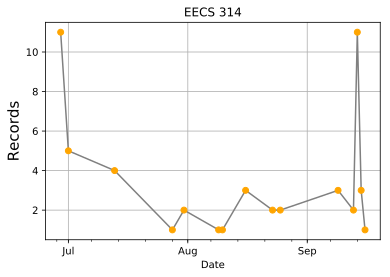

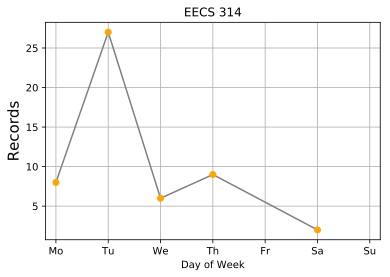

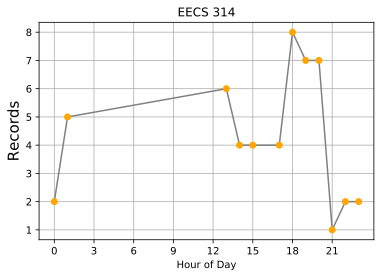

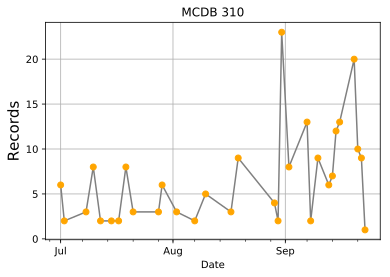

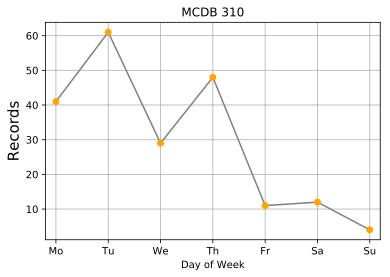

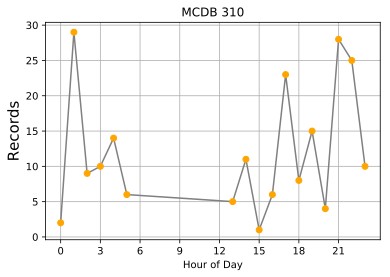

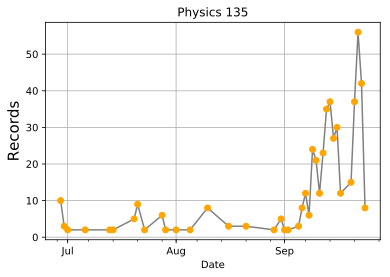

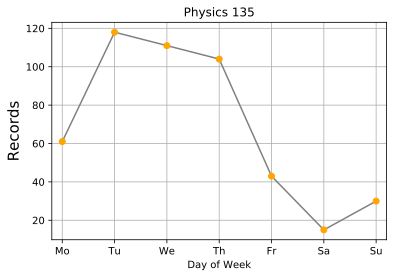

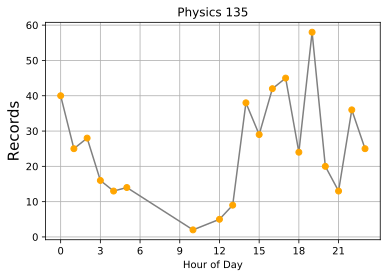

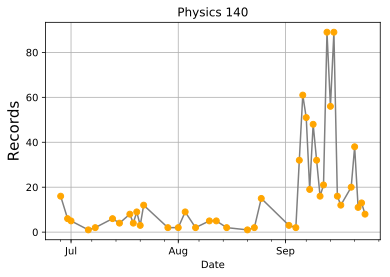

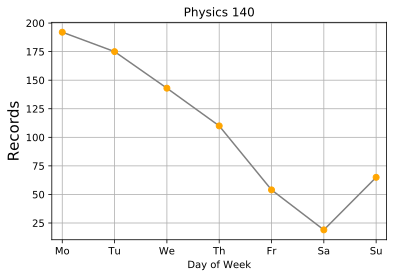

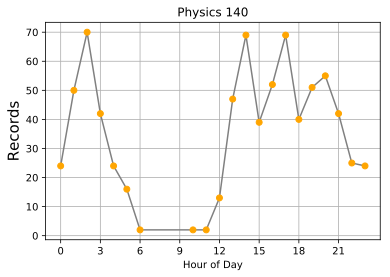

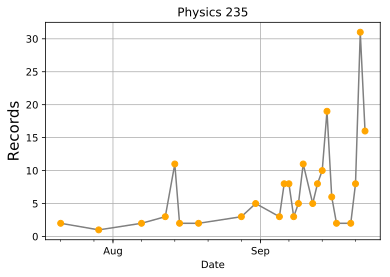

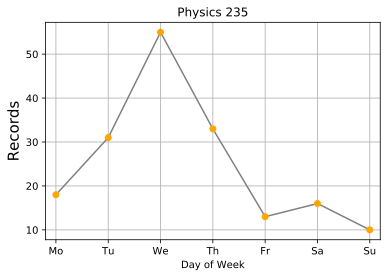

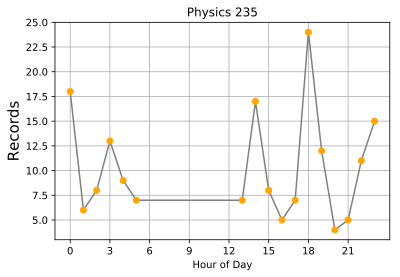

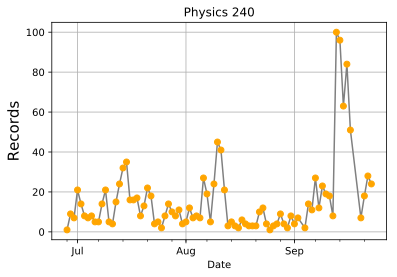

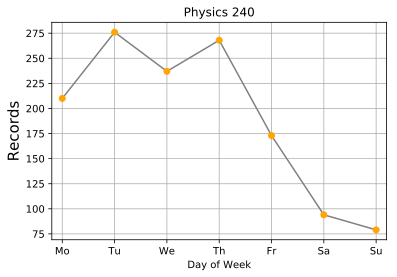

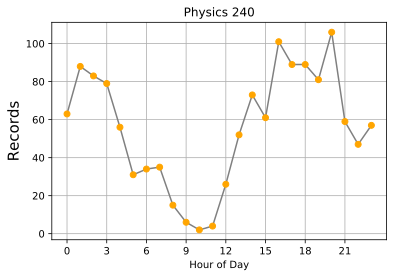

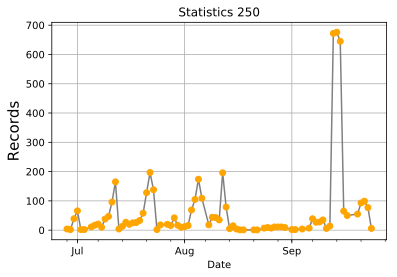

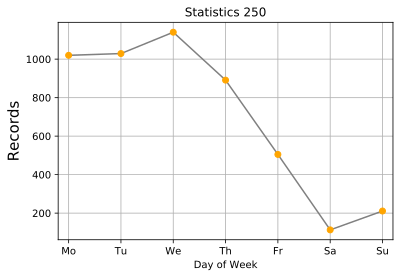

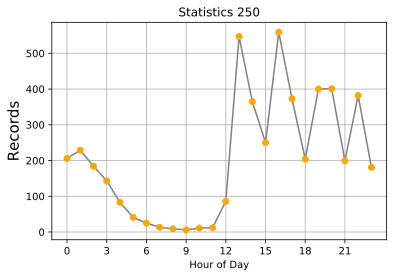

In [5]:
if (pdfOutput):
    pdf = PdfPages(pdfFilename)
else:
    %matplotlib inline
    %config InlineBackend.figure_format = FIGURE_FORMAT_SVG
    
for course, mat in agg.groupby('course'):    
    visualizeByDate(course, mat, pdfOutput)
    visualizeByWeekday(course, mat, pdfOutput)
    visualizeByHour(course, mat, pdfOutput)

if (pdfOutput):        
    result = pdf.close()

> 💡If the graphs aren't shown neatly above, click on the gray area that appears in the left margin when you move the pointer over it.

> 🙁Unfortunately, preventing the "`matplotlib.figure.Figure`…" output when the program ends has been difficult.  A solution is being sought.  It's safe to ignore the single line of output that appears.

----
## Prerequisites

This notebook requires the following modules:

* [`numpy`](https://pypi.org/project/numpy/) &ndash; The fundamental package for scientific computing with Python.
* [`matplotlib`](https://pypi.org/project/matplotlib/) &ndash; A plotting library for Python and its numerical mathematics extension NumPy.
* [`pandas`](https://pypi.org/project/pandas/) &ndash; Provides high-performance, easy-to-use data structures and data analysis tools.
* [`ndjson`](https://pypi.org/project/ndjson/) &ndash;
  A module for handling newline-delimited JSON.

> 💡If this notebook fails to run because some of the required modules are not installed, click the "Install Modules" button below the following cell to try to install the modules. (If the button isn't shown, then run the cell to make it appear.)
> 
> After installing modules, you need to restart the kernel for this notebook before continuing.

In [6]:
import ipywidgets

# Not sure why recent package versions give an error about "msgpack", so install it explicitly.

def installModules(click):
    import sys
    !{sys.executable} -m pip install msgpack numpy matplotlib pandas ndjson

button = ipywidgets.Button(description='Install Modules', button_style='success', icon='download')
button.on_click(installModules)
button

Button(button_style='success', description='Install Modules', icon='download', style=ButtonStyle())